<a href="https://colab.research.google.com/github/ylkim1947/Mask_RCNN/blob/master/Adding%20noise%20for%20image%20preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image preprocessing 
 When taking picture under the dim light environment, an object of the picture seems not clear. Although human vision can discriminate the object in the picture well , the AI (machine learning or deep learning) often fails to detect the objects. 

#### **That's why**

 1) The normal data from good conditions are used for training data sets of the most AI 

 2) 



### **The purpose of this script :** To preprocess the images for the deep learning models


 #### 1) For test set

* gaussian noise images

    * assuming bad condition 


 #### 2) For training set

* color Normalized images
* grey scale iamges 






#### [Reference]

https://debuggercafe.com/adding-noise-to-image-data-for-deep-learning-data-augmentation/

https://wikidocs.net/156985  : PyTorch 딥러닝 챗봇, 5-1 Transform



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:

from glob import glob
dataset_path ='/content/drive/MyDrive/Colab Notebooks/project4/yolov5/Socar_Hackerthon-2'
testset_path = dataset_path +'/test/images'
img_list = glob(testset_path +'/*.jpg')

print(len(img_list))

136


In [100]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.utils import save_image
from skimage.util import random_noise

import os
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import image

In [94]:
class TorchvisionMaskDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
       # self.imgs = list(sorted(os.listdir(self.path)))
        self.imgs = glob(self.path)
        self.transform = transform

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        file_image = self.imgs[idx]
        file_label = self.imgs[idx][:-3] + 'xml'
        img_path = os.path.join(self.path, file_image)
        image = Image.open(img_path)
        if self.transform:
            img = self.transform(image)

        return img

torchvision_transform = transforms.Compose([
    #transforms.Resize((300, 300)), 
    #transforms.RandomCrop(224),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomHorizontalFlip(p = 1),
    transforms.ToTensor(),
])

torchvision_dataset = TorchvisionMaskDataset(
    path =testset_path +'/*.jpg',
    transform = torchvision_transform
)

In [95]:
len(torchvision_dataset) # Data 갯수

136

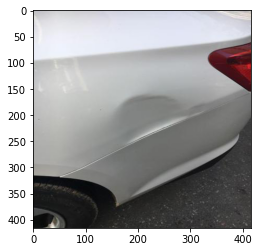

In [97]:
# Original 이미지 
img_o = image.imread(img_list[2])
plt.imshow(img_o)

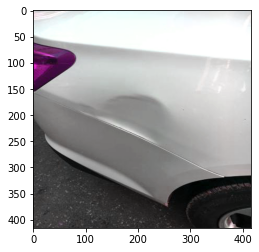

In [96]:
## Torchvison transform 한 이미지

tf = transforms.ToPILImage()
img_t = tf(torchvision_dataset[2])
plt.imshow(img_t)

In [123]:
BATCH_SIZE = 1

testloader = torch.utils.data.DataLoader(
    torchvision_dataset, 
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [124]:
len(testloader)

136

In [160]:
def save_noisy_image(img, name):
    if img.size(1) == 3:
        img = img.view(img.size(0), 3, 416, 416)
        save_image(img, name)
    else:
        img = img.view(img.size(0), 3, 416, 416)
        save_image(img, name)

In [150]:
# 경로에 폴더가 없으면, 폴더 만듬 + 상위 폴더도 같이 만들어줌
def makedirs(path): 
    try:
      if not os.path.exists(path):
          os.makedirs(path)
    except OSError:
        print("Error: Failed to create the directory.")

In [161]:
def gaussian_noise():
  gau_path = f"{dataset_path}/test/images_gaus/"
  os.makedirs(gau_path) 
  for num, data in enumerate(testloader):
        img= data[0]
        gauss_img = torch.tensor(random_noise(img, mode='gaussian', mean=0, var=0.05, clip=True)) # 가우시안 filtering 
        save_noisy_image(gauss_img, f"{gau_path}/{num}_gaussian.jpg")
        #break

In [157]:
gaussian_noise()

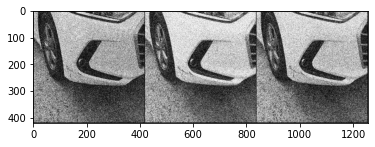

In [162]:
img_list_gaus = glob( f"{dataset_path}/test/images_gaus/" +'/*.jpg')
# Original 이미지 
img_g = image.imread(img_list_gaus[1])
plt.imshow(img_g)

In [ ]:
def salt_pepper_noise():
    for num,data in enumerate(trainloader):
        img, _ = data[0], data[1]
        s_and_p = torch.tensor(random_noise(img, mode='s&p', salt_vs_pepper=0.5, clip=True))
        save_noisy_image(s_and_p, f"Images/{args['dataset']}_s&p.png")
        #break

In [ ]:
def speckle_noise():
    for data in trainloader:
        img, _ = data[0], data[1]
        speckle_noise = torch.tensor(random_noise(img, mode='speckle', mean=0, var=0.05, clip=True))
        save_noisy_image(speckle_noise, f"Images/{args['dataset']}_speckle.png")
        break